In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
from matplotlib import colors
from scipy import stats
import statistics
from scipy.optimize import curve_fit
import pwlf


4.1 and 4.2

there is no path connecing two sides of the grid


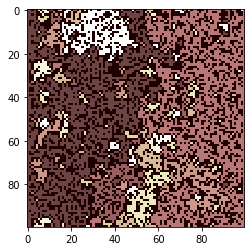

In [28]:
L = int(input("enter L:"))                  # Taking grid size
P = float(input("enter probability"))       # Taking probability of turning the cell on.
#colorlist = colorlist = colors.ListedColormap(['white','purple'])
ConductCheck = False

class gridmaker:                            # Defining grid
    def __init__(self, l, p):
 
        self.p = p
        self.l = l
        self.grid = np.zeros((l,l),dtype=int)       # 2d array for generating the random grid
 
    def RandCellOn(self):                         # Deciding if each cell should be turned on or not.
        for i in range(self.l):
            for j in range(self.l):
                x = rnd.random()
                if x <= self.p:
                    self.grid[i][j] = 1

class ColoringAlgorithm: 

    def __init__(self,l,p):

        self.p = p
        self.l = l
        self.GridValue = np.zeros((l,l),dtype = int) # 2D array for saving the values used in coloring algorithm for finding whether there is a path connecting two sides        
 
    def ColoringAlg(self):

        for i in range(self.l):                       #Simply implementing the coloring algorithm using loops based on flochart explained in notes
            self.GridValue[i][0] = 1
            self.GridValue[i][self.l-1] = self.l*self.l
        for i in range(self.l):
            for j in range(1,self.l):
                y = rnd.random()
                if y <= self.p:
                    self.GridValue[i][j]  = i* self.l + j + 1
                    if self.GridValue[i-1][j]==0 and self.GridValue[i][j-1] != 0:
                        self.GridValue[i][j] = self.GridValue[i][j-1]
                    elif self.GridValue[i-1][j] !=0 and self.GridValue[i][j-1] == 0:
                        self.GridValue[i][j] = self.GridValue[i-1][j]
                    elif self.GridValue[i-1][j] !=0 and self.GridValue[i][j-1] != 0:
                        MinNeighbour = min(self.GridValue[i-1][j],self.GridValue[i][j-1])
                        Maxneighbour = max(self.GridValue[i-1][j],self.GridValue[i][j-1])
                        self.GridValue[i][j] = MinNeighbour
                        for k in range(self.l):
                            for m in range(self.l):
                                if self.GridValue[k][m] == Maxneighbour:
                                    self.GridValue[k][m] = MinNeighbour

    def CheckConductivity(self):
        
        if self.GridValue[0][self.l-1] == 1:
            print("this grid is conductive")
        else:
            print("there is no path connecing two sides of the grid")


#grid1 = gridmaker(L,P)
#grid1.RandCellOn()
#plt.imshow(grid1.grid , interpolation='none', origin = 'lower' )        # Plotting constructed grid by method used in gridmaker class (Q4.1)

gridvalue1 = ColoringAlgorithm(L,P)
gridvalue1.ColoringAlg()

#plt.imshow(gridvalue1.GridValue  ,  interpolation= 'none' , origin = 'lower') # Plotting constructed grid by method used in ColoringAlgorythm suggested for Q4.2
#print(gridvalue1.GridValue)
plt.imshow(11*gridvalue1.GridValue%10 , cmap = 'pink' ,  interpolation= 'none' , origin = 'upper') # Plotting constructed grid by method used in ColoringAlgorythm suggested for Q4.2
gridvalue1.CheckConductivity() 
    


4.3 Hoshen-Kopelman

there is no path connecing two sides of the grid


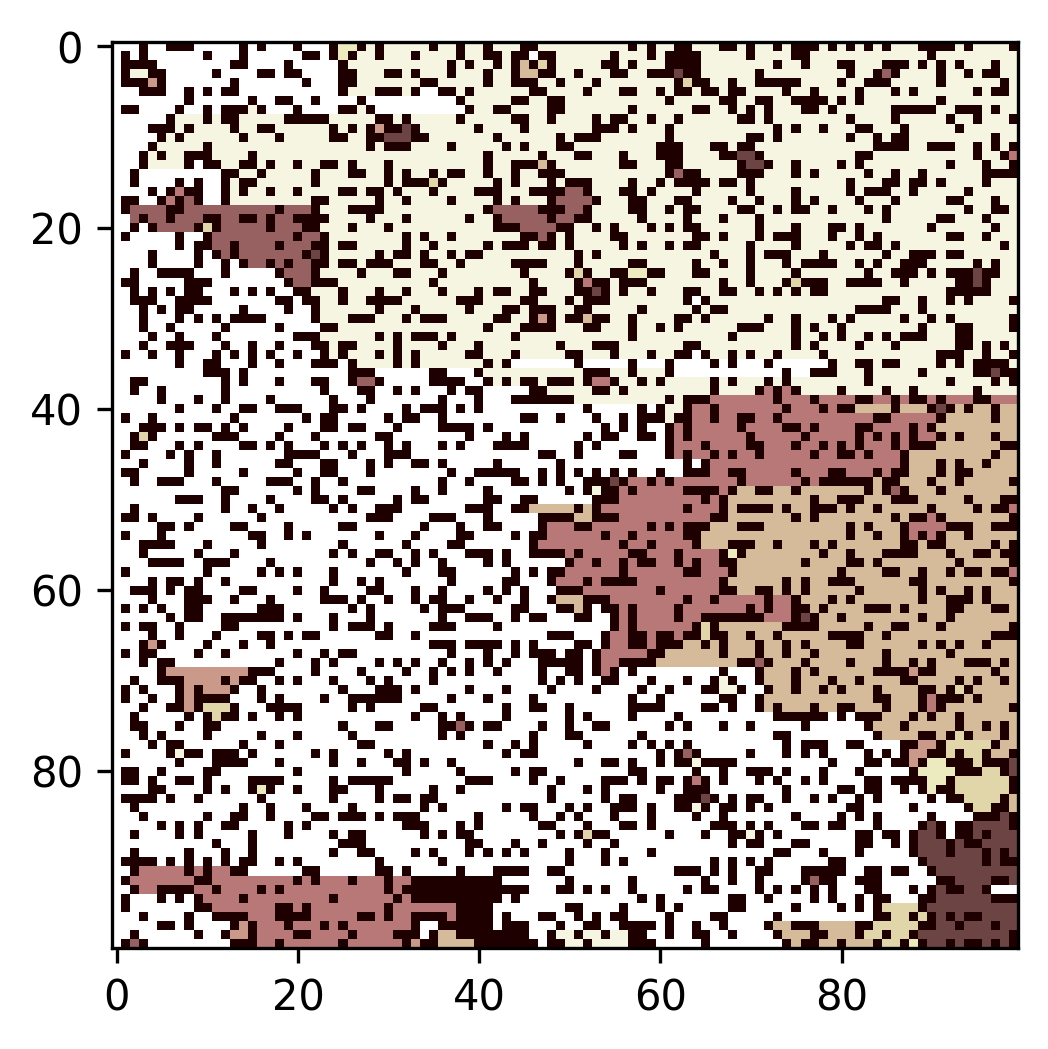

In [71]:
L = int(input("enter L:"))                  # Taking grid size
P = float(input("enter probability"))       # Taking probability of turning the cell on.

class HoshenKopelman: 
    
    def __init__(self,l,p):
        self.p = p
        self.l = l
        self.GridColor = np.zeros((l,l),dtype = int) # 2D array for saving the values used in HC algorythm (for adding the neighbours label in this 2D grod  )      
        self.LabelList = np.zeros((l*l),dtype =int)    # 1D array for saving the lables
        self.SizeList = np.zeros((l*l),dtype = int)    # 1D array for saving the cluster size
    

    def HoshenKoplmanAlg(self):
        k = 2
        self.LabelList[0] = 0
        self.LabelList[1] = 1
        self.SizeList[1] = self.l
        for i in range(self.l):                       #Simply implementing Hoshen Kopelman algorithm using loops based on flochart explained in notes
            self.GridColor[i][0] = 1
        for i in range(self.l):
            for j in range(1,self.l):
                y = rnd.random()
                if y <= self.p: 
                    if self.GridColor[i-1][j] != 0 and self.GridColor[i][j-1] == 0:         # Only upper neighbour is On
                        self.GridColor[i][j] = self.LabelList[self.GridColor[i-1][j]] 
                        self.SizeList[self.LabelList[self.GridColor[i-1][j]]] += 1
                    elif self.GridColor[i-1][j] == 0 and self.GridColor[i][j-1] != 0:       # Only left neighbour is On
                        self.GridColor[i][j] = self.LabelList[self.GridColor[i][j-1]]
                        self.SizeList[self.LabelList[self.GridColor[i][j-1]]] += 1
                    elif self.GridColor[i-1][j] == 0 and self.GridColor[i][j-1] == 0:       # Both neighbours are Off
                        self.LabelList[k] = k 
                        self.GridColor[i][j] = self.LabelList[k]
                        self.SizeList[self.LabelList[k]] = 1
                        k = k + 1
                    elif self.GridColor[i-1][j] != 0 and self.GridColor[i][j-1] != 0:       # Both neighbours are On
                        self.GridColor[i][j] = self.LabelList[self.GridColor[i][j-1]]
                        self.LabelList[self.GridColor[i-1][j]] = self.LabelList[self.GridColor[i][j-1]]
                        self.SizeList[self.LabelList[self.GridColor[i][j-1]]] += self.SizeList[self.LabelList[self.GridColor[i-1][j]]] +1
                        if self.GridColor[i-1][j] != self.GridColor[i][j-1]:
                            self.SizeList[self.LabelList[self.GridColor[i-1][j]]] = 0

    def HoshenKopelmanColorRecheck(self):   # Looping over the whole grid again for fixing the colors 
                                            # (this is needed to show the right colloring for the last elif where both neighbours are on 
                                            #  and the upper labels are changed withouth changing the colorgrid values.)
        for i in range(self.l):
            for j in range(self.l):
                while(self.GridColor[i][j] != self.LabelList[self.GridColor[i][j]]):
                    self.GridColor[i][j] = self.LabelList[self.GridColor[i][j]]
    
    def HoshenKopelmanConductivityCheck(self):                   #checking if the grid is conductive by looking for lable[1] in the last column
        check = False
        for i in range(self.l):
            if self.GridColor[i][self.l-1] == self.LabelList[1]:
                check = True
        if check == True:
            print("this grid is conductive")
        else:
            print("there is no path connecing two sides of the grid")

gridcolor1 = HoshenKopelman(L,P)
gridcolor1.HoshenKoplmanAlg()
gridcolor1.HoshenKopelmanColorRecheck()
gridcolor1.HoshenKopelmanConductivityCheck()

plt.figure(dpi=300)
plt.imshow(11*gridcolor1.GridColor%10 , cmap = 'pink' ,  interpolation= 'none' , origin = 'upper') # Plotting constructed grid by method used in ColoringAlgorythm suggested for Q4.2

#print(gridcolor1.GridColor)
#print(gridcolor1.LabelList)
#print(gridcolor1.SizeList)  

